In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

# Función de regresión logística
def regresion_logistica(datos):
    x = datos[['Edad', 'Colesterol']]
    y = datos['Enfermedad']
    
    modelo = LogisticRegression()
    modelo.fit(x, y)
    return modelo


# Ejemplo de uso con datos de pacientes
data = {
    'Edad': [50, 35, 65, 28, 60],
    'Colesterol': [180, 150, 210, 130, 190],
    'Enfermedad': [1, 0, 1, 0, 1]
    }
    
df = pd.DataFrame(data)
modelo_regresion_logistica = regresion_logistica(df)
# Estimaciones de clasificación binaria para nuevos datos
nuevos_datos = pd.DataFrame({'Edad': [45, 55], 'Colesterol': [170, 200]})
estimaciones_clasificacion = modelo_regresion_logistica.predict(nuevos_datos)
print("Estimaciones de Clasificación:")
print(estimaciones_clasificacion)

Estimaciones de Clasificación:
[1 1]


In [261]:
df = pd.read_csv("C:/Users/Fanper/Documents/PYTHON/Proyectos_IA/vehiculos.csv")
df.columns = ["Compacidad", "Circularidad", "Circularidad_Distancia", "Relación_Radio", 
            "Relación_Eje_Principal", "Relación_Longitud_Máxima", "Relación_Dispersión",
            "Alargamiento", "Rectangularidad_Eje_Principal", "Rectangularidad_Longitud_Máxima",
            "Varianza_Escalada_Eje_Mayor", "Varianza_Escalada_Eje_Menor", 
            "Radio_Giro_Escalado", "Asimetría_Eje_Mayor", "Asimetría_Eje_Menor", 
            "Curtosis_Eje_Menor", "Curtosis_Eje_Mayor", "Relación_Huecos", 
            "Clase_Vehículo"]
df.head()

,Compacidad,Circularidad,Circularidad_Distancia,Relación_Radio,Relación_Eje_Principal,Relación_Longitud_Máxima,Relación_Dispersión,Alargamiento,Rectangularidad_Eje_Principal,Rectangularidad_Longitud_Máxima,Varianza_Escalada_Eje_Mayor,Varianza_Escalada_Eje_Menor,Radio_Giro_Escalado,Asimetría_Eje_Mayor,Asimetría_Eje_Menor,Curtosis_Eje_Menor,Curtosis_Eje_Mayor,Relación_Huecos,Clase_Vehículo
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0,van
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0,van
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196.0,saab
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0,van
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0,bus


In [262]:
df["Clase_Vehículo"].unique()

array(['van', 'saab', 'bus', 'opel'], dtype=object)

In [263]:
y = df["Clase_Vehículo"]
x = df.drop("Clase_Vehículo", axis=1)

In [264]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=62)

In [265]:
knn = KNeighborsClassifier(n_neighbors=4)

In [266]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [267]:
predicciones = knn.predict(x_test)
confusion_matrix(y_test, predicciones)

array([[58,  7,  2,  1],
       [ 4, 35, 16,  7],
       [ 2, 30, 27,  2],
       [ 3,  2,  1, 57]], dtype=int64)

In [268]:
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

         bus       0.87      0.85      0.86        68
        opel       0.47      0.56      0.51        62
        saab       0.59      0.44      0.50        61
         van       0.85      0.90      0.88        63

    accuracy                           0.70       254
   macro avg       0.69      0.69      0.69       254
weighted avg       0.70      0.70      0.69       254



In [269]:
tasa_error = []
for i in range(1, 60):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    predicion_i = knn.predict(x_test)
    tasa_error.append(np.mean(predicion_i != y_test))

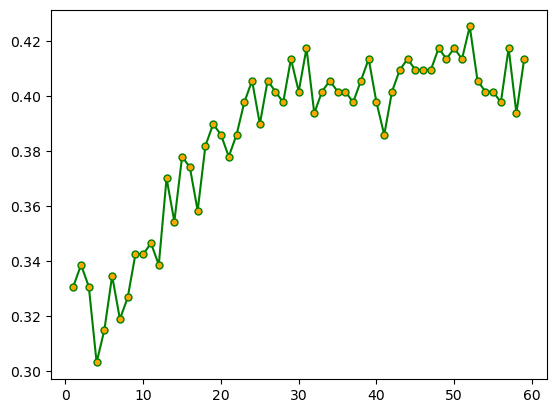

In [270]:
valores = range(1, 60)
plt.plot(valores, tasa_error, color = "green", marker="o", markerfacecolor="orange", markersize=5)

In [271]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

# Función de clasificación KNN
def knn_clasificacion(datos, k=3):
    # Separa los datos en características (X) e etiqueta (y)
    x = datos[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
    y = datos['species']
    
    # Crea y ajusta el modelo KNN
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x, y)
    
    return knn

# Ejemplo de uso con el conjunto de datos Iris
data = pd.read_csv('iris.csv')  # Reemplaza 'iris.csv' con tu archivo de datos
modelo_knn = knn_clasificacion(data, k=3)

# Estimaciones de clasificación para nuevas muestras
nuevas_muestras = pd.DataFrame({
        'sepal_length': [5.1, 6.0, 4.4],
        'sepal_width': [3.5, 2.9, 3.2],
        'petal_length': [1.4, 4.5, 1.3],
        'petal_width': [0.2, 1.5, 0.2]
    })

estimaciones_clasificacion = modelo_knn.predict(nuevas_muestras)
print("Estimaciones de Clasificación:")
print(estimaciones_clasificacion)




Estimaciones de Clasificación:
['Setosa' 'Versicolor' 'Setosa']


In [272]:
vinos = pd.read_csv("C:/Users/Fanper/Documents/PYTHON/Proyectos_IA/vino.csv")
vinos.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine Type
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,One
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,One
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,One
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,One
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,One


In [273]:
vinos["Wine Type"].unique()

array(['One', 'Two', 'Three'], dtype=object)

In [274]:
vinos["Wine Type"].value_counts()

Wine Type
Two      71
One      59
Three    48
Name: count, dtype: int64

In [275]:
X = vinos.drop("Wine Type", axis=1)
Y = vinos["Wine Type"]

In [276]:
X.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [277]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=62)

In [278]:
arbol = DecisionTreeClassifier()
arbol.fit(X_train, Y_train)

DecisionTreeClassifier()

In [279]:
predic = arbol.predict(X_test)
predic

array(['One', 'Three', 'Two', 'Three', 'One', 'One', 'Two', 'Two',
       'Three', 'One', 'Three', 'One', 'Two', 'Three', 'Two', 'Three',
       'Two', 'Two', 'Two', 'Three', 'Three', 'Two', 'One', 'One', 'Two',
       'One', 'One', 'Three', 'One', 'Three', 'Three', 'Two', 'Three',
       'Two', 'Three', 'Two', 'One', 'Two', 'Three', 'Two', 'One',
       'Three', 'Three', 'One', 'Three', 'Two', 'One', 'Two', 'Two',
       'Two', 'Two', 'One', 'Three', 'Three'], dtype=object)

In [280]:
print(classification_report(Y_test, predic))

              precision    recall  f1-score   support

         One       0.93      0.93      0.93        15
       Three       0.84      0.94      0.89        17
         Two       0.90      0.82      0.86        22

    accuracy                           0.89        54
   macro avg       0.89      0.90      0.89        54
weighted avg       0.89      0.89      0.89        54



In [281]:
print(confusion_matrix(Y_test, predic))

[[14  0  1]
 [ 0 16  1]
 [ 1  3 18]]
